# Statistical Learning
## Author -- Abhinav Tyagi

## Domain: Healthcare, Insurance
Leveraging customer information is paramount for most businesses. In the case of an insurance company,attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.
## Attribute Information: 
age: age of primary beneficiary
sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
children: Number of children covered by health insurance / Number of dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
charges: Individual medical costs billed by health insurance
## Objective:
We want to see if we can dive deep into this data to find some valuable insights

# Steps and tasks

## 1. Import the necessary libraries 

In [35]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import copy
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 2. Read the data as a data frame (3 marks)


In [36]:
data=pd.read_csv("insurance.csv")
data.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# 3. Perform basic EDA which should include the following and print out your insights at every step. ( 27 marks)

## a. Shape of the data

In [37]:
data.shape

(1338, 7)

## b. Data type of each attribute 

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## c. Checking the presence of missing values

In [39]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing and null value present in the dataframe.

## d. 5 point summary of numerical attributes

In [40]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Looking at the age column, data looks representative of the true age distribution of the adult population Very few people have more than 2 children. 75% of the people have 2 or less children

The charge is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of

## e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

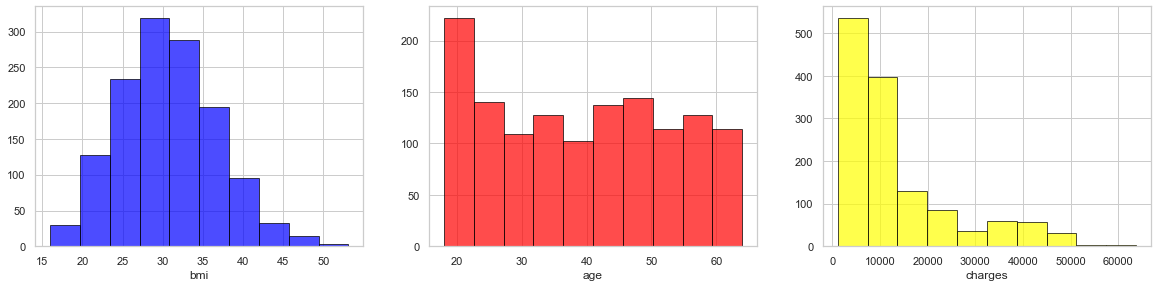

In [70]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data.bmi, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(data.age, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(data.charges, color='yellow', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

<AxesSubplot:xlabel='bmi', ylabel='Density'>

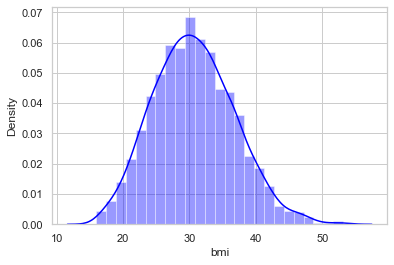

In [71]:
sns.distplot(data['bmi'],color='blue')


### Bmi
Is in a considerable good shape not much left skewness is present.Very less people with lower bmi exists in the datase

bmi is approx normally distributed

<AxesSubplot:xlabel='age', ylabel='Density'>

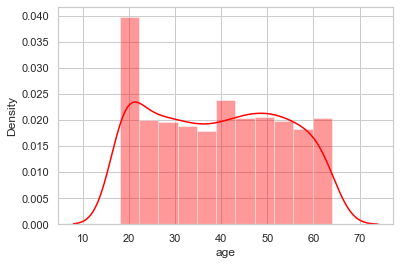

In [73]:
sns.distplot(data['age'],color='red')

### age
This attribute tells highest participation is done by the age around 20yrs old customers. Though the data is very very slightly more for higher age people is present

Age seems distributed quiet uniformly

<AxesSubplot:xlabel='charges', ylabel='Density'>

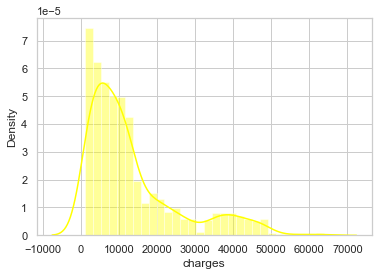

In [74]:
sns.distplot(data['charges'],color='yellow')

### Charges 
High left skewness in the dataset tells lmostly less individual medical costs is billed by health insurance.

Charges are highly skewed

## f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [45]:
print("Skewness :\n",data.skew(axis=0))

Skewness :
 age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64


Skew of bmi is very less as seen in the previous step

age is uniformly distributed and there's hardly any skew

charges are highly skewed

<AxesSubplot:xlabel='age'>

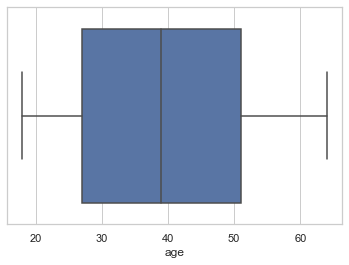

In [46]:
sns.set(style="whitegrid")
sns.boxplot(data["age"])

<AxesSubplot:xlabel='bmi'>

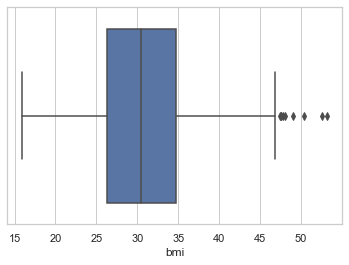

In [47]:
sns.boxplot(data["bmi"])

<AxesSubplot:xlabel='charges'>

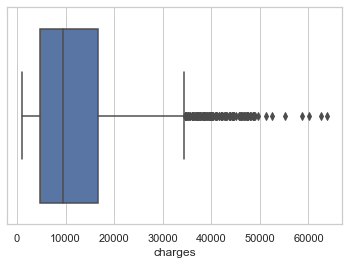

In [48]:
sns.boxplot(data["charges"])

<AxesSubplot:>

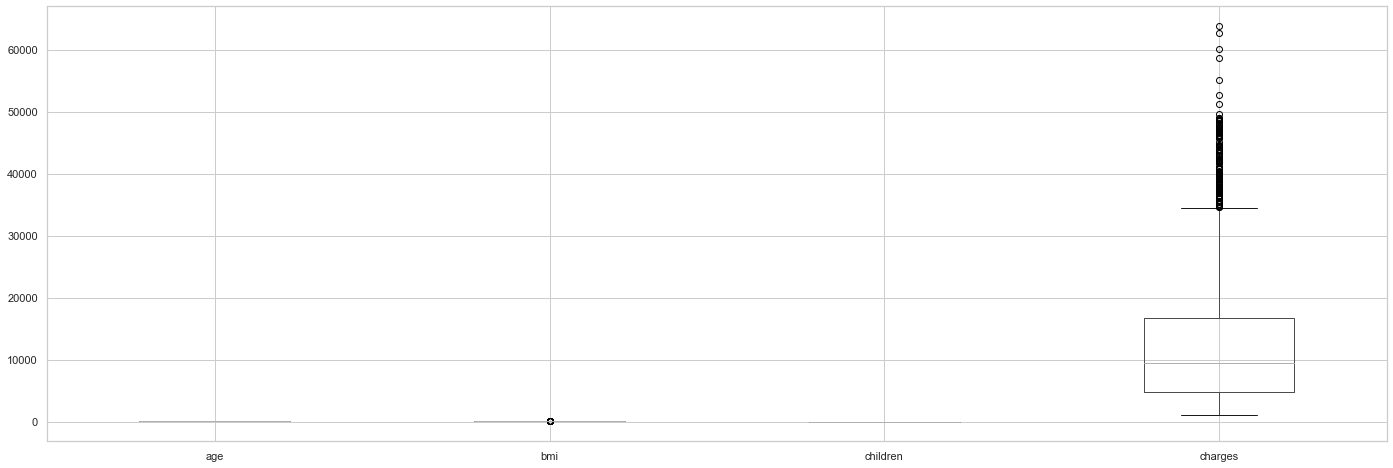

In [49]:
data.boxplot(figsize=(24,8))

## g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

In [50]:
IQR = np.subtract(*np.percentile(data['charges'], [75, 25]))
print(IQR)

11899.625365


In [51]:
#Outlier for BMI
q25, q75 = np.percentile(data['charges'], 25), np.percentile(data['charges'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in data['charges'] if x < lower or x > upper]
print('Identified outliers for charges out of 1138: %d' % len(outliers))

Identified outliers for charges out of 1138: 139


In [52]:
#Outlier for Charges
q25, q75 = np.percentile(data['bmi'], 25), np.percentile(data['bmi'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in data['bmi'] if x < lower or x > upper]
print('Identified outliers for bmi out of 1338 records: %d' % len(outliers))

Identified outliers for bmi out of 1338 records: 9


bmi has less extreme values which tell very less people have bmi out the range of average people.

charges as it is highly skewed, there are quiet a lot of extreme values. Shows rarely people gave high charges.

No outlier in age attribute.

## h. Distribution of categorical columns (include children) 

## Bivariate

<AxesSubplot:xlabel='children', ylabel='charges'>

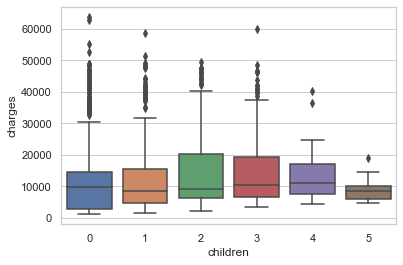

In [53]:
sns.boxplot(x='children', y='charges', data= data)

In some cases we see the extremly higher charges are paid by people having no child while least paid when having 5 children.

<AxesSubplot:xlabel='sex', ylabel='charges'>

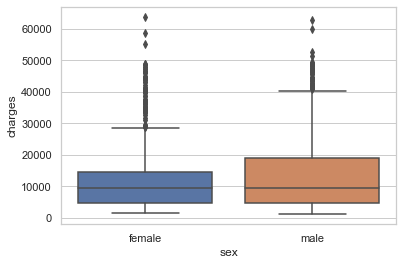

In [54]:
sns.boxplot(x='sex', y='charges', data= data)

In both the male and female we see many among them had paid the extreme charges.Female has more outliers while males have a right skew telling more of them pay higher charges.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

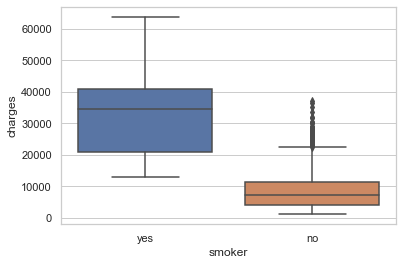

In [55]:
sns.boxplot(x='smoker', y='charges', data= data)

Smokers pay higher medical costs billed by health insurance than the non-smokers.However, there are some outliers exists in the nonsmoker who pay higher charges.

## Univariate

<AxesSubplot:xlabel='children', ylabel='count'>

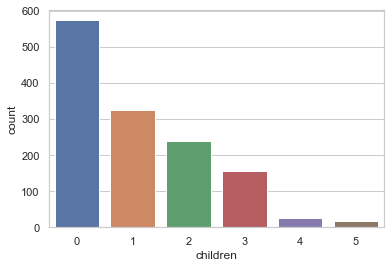

In [56]:
sns.countplot(data['children'])

Most Customers do not have childrens while very less have 5.


<AxesSubplot:xlabel='sex', ylabel='count'>

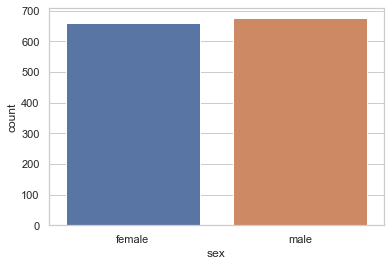

In [57]:
sns.countplot(data['sex'])

The Gender RAtio of isurance contractor is not significantly different

<AxesSubplot:xlabel='smoker', ylabel='count'>

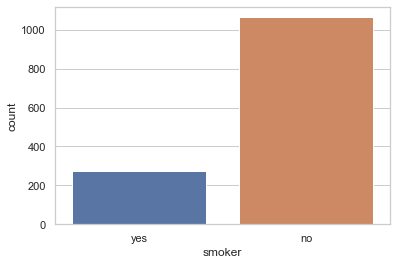

In [58]:
sns.countplot(data['smoker'])

Non Smokers is quite high than the smokers

<AxesSubplot:xlabel='region', ylabel='count'>

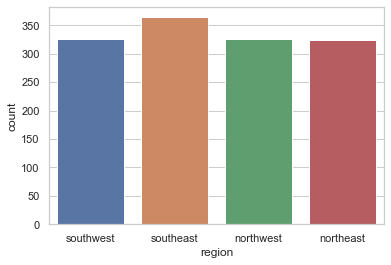

In [59]:
sns.countplot(data['region'])

Instances are distributed evenly accross all regions.

## i. Pair plot that includes all the columns of the data frame 

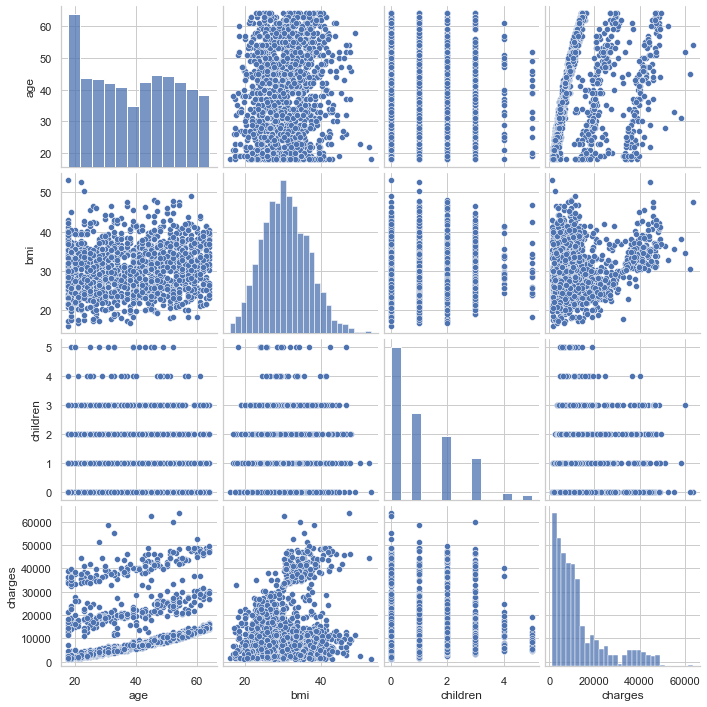

In [60]:
sns.pairplot(data)

The only obvious correlation of 'charges' is with 'smoker'

Looks like smokers claimed more money than non-smokers

There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged more than the younger ones

# 4. Answer the following questions with statistical evidence (20 marks)

## a) Do charges of people who smoke differ significantly from the people who don't?

In [61]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

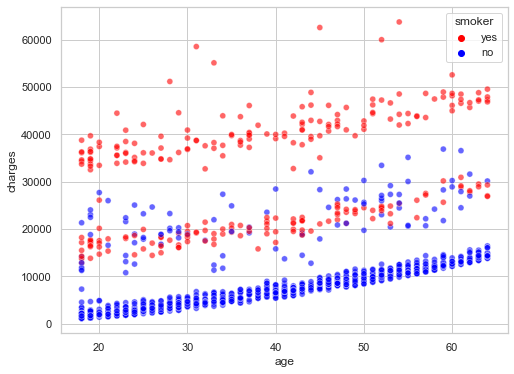

In [75]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(data.age, data.charges,hue=data.smoker,palette= ['red','blue'] ,alpha=0.6)
plt.show()

Through visualization we can clearly see that smokers differ significantly from the no-smokers.

In [76]:
#Applying T-test to determine the impact of smoking on the charges.
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

x = np.array(data[data.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(data[data.smoker == 'no'].charges)   # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


Rejecting the null hypothesis as the p_value is lesser than 0.05. It tells us that the paid charges by the smokers and non-smokers is significantly different.Smokers pay higher charges in comparison to the non-smokers

## b) Does bmi of males differ significantly from that of females? 

In [64]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

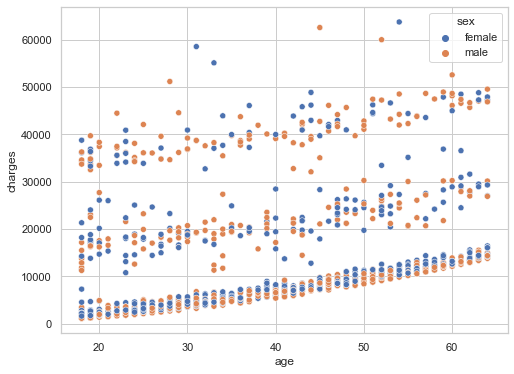

In [65]:
plt.figure(figsize=(8,6))
sns.scatterplot(data.age, data.charges,hue=data.sex  )
plt.show()

Through vizualisation here we can't clearly conclude the relation between age and charges

In [66]:
## Check dependency of bmi on gender.#Performing an Independent t-test
Ho = "Gender has no impact on bmi"   
Ha = "Gender has an impact on bmi"   

x = np.array(data[data.sex == 'male'].bmi)  
y = np.array(data[data.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)

0.08997637178984932


Accepting nullhypothesis as pvalue >0.05. Hence,Gender has no impact on bmi.

## c) Is the proportion of smokers significantly different in different genders? 

In [67]:
# We will perform Chi_square test to check the proportion of smokers differs as per gender.
Ho = "Gender has no effect on smoking habits" 
Ha = "Gender has an effect on smoking habits"   

crosstab = pd.crosstab(data['sex'],data['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print(p_value)

0.006548143503580696


Rejecting null hypothesis. Hence,smoking habits differs with the gender.

## d) Is the distribution of bmi across women with no children, one child and two children, the same ?

In [68]:
# Applying anova test to check the proportion.
Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   

female_df = copy.deepcopy(data[data['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)

0.7158579926754841


Accepting the null hypothesis.Hence,it tells the number of children is not effecting any difference in women bmi.